<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/lagrange_optimization/blob/master/lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrangian Optimization
The [Lagrange Multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) Method allows to find a set of equations which describe where an objective function is maximum or minimum, knowing that there are one or more constraint functions.

Depending on whether the object function is convex or concave, we will determine minimum or maximum values, respectively.


Lagrangian Optimization is based on the idea that the objective function is maximized or minimized when the [gradient](https://en.wikipedia.org/wiki/Gradient) of the objective function (the direction of the maximum change of the objective function) is parallel (is the same that) to the gradient(s) of the constraint function(s).

For example, if we have an objetive function $O(x,y)$ and a constraint function $C(x,y)$, we have that
\begin{align}
\frac{\partial O}{\partial x} = \lambda \frac{\partial C}{\partial x}\\
\frac{\partial O}{\partial y} = \lambda \frac{\partial C}{\partial y}.\\
\end{align}

These equations, considered with the constraint(s), allow to find a set of equations, that when solved, determine the values of $x$ and $y$ that maximize or minimize the objective function.

## Example: find the largest rectangle inside of a elipse (continuous differentiable case)

```
             ^ y
         ....|.... <- elipse
       +-----+-----+ (x^*,y^*)
      .|     |     |.
     --+-----+-----+-->x
      .|     |     |.
       +-----+-----+ <- rectangle
        .....|.....
```

Problem: maximize $p(x,y)=4x+4y$ (objective) subject to $g(x,y)=x^2+4y^2=4$ (constraint).

This constrained optimization problem can be transformed into the following unconstrained optimization problem: maximize $j(x,y,\lambda) = p(x,y)-\lambda (4-g(x,y))$.

Taking the derivative of $j$ respect to $x$ and $y$ and setting it equal to zero, we get that

\begin{equation}
\left. \begin{array}{cc}
  \frac{\partial p}{\partial x} = \lambda\frac{\partial g}{\partial x} \implies 4=\lambda 2x\\
  \frac{\partial p}{\partial y} = \lambda\frac{\partial g}{\partial y} \implies 4 = \lambda 8y
\end{array}\right\} \implies x = 4y.
\end{equation}

Substituting in the constraint, we get that

\begin{equation}
  (4y)^2+4y^2=4 \implies 20y^2=4 \implies y^*=1/\sqrt{5}.
\end{equation}

Substituting in the previous equation, we get that

\begin{equation}
  x^* = 4/\sqrt{5}.
\end{equation}

Finally, the maximum perimeter is obtained at

\begin{equation}
  p(\frac{4}{\sqrt{5}},\frac{1}{\sqrt{5}})=4\sqrt{5}.
\end{equation}

Notice that is is a maximum because $p(0,1)=4<4\sqrt{5}$ and $p(2,0)=8<4\sqrt{5}$.

## Example: [RDO (Rate/Distortion Optimization) in block-based image orthogonal transform coding](https://www.sciencedirect.com/book/9780126208627/introduction-to-data-compression) (continuous differentiable case)
In transform coding, the codec divides the input image in $B$ blocks that are transformed into $M$ coefficients. 

Let suppose that

\begin{equation}
  R = \sum_k^M R_k \tag{1}
\end{equation}

is the average number of bits/coefficient and $R_i$ the average number of bits assigned to each coefficient. We want to find how many bits should be asigned for each coefficient by an uniform quantizer.

In transform coding, on average, the distortion introduced by the quantization of a coefficient is proportional to the variance of the position of the coefficient in the block. Specifically, for the $k$-th quantizer, the variance of the reconstruction error is

\begin{equation}
  \sigma(r)^2_k = \alpha_k 2^{-2 R_k}\sigma(i)^2_k, \tag{2}
\end{equation}

where $\sigma(i)^2_k$ is the variance of the input coefficients of the $k$-th quantizer, and $\alpha_k$ is a factor that depends on the input distribution and the quantizer.

The total reconstruction error for a block is given by

\begin{equation}
  \sigma(r)^2 = \sum_k^M\alpha_k2^{-2R_k}\sigma(i)^2_k. \tag{3}
\end{equation}

The objective of the bit allocation procedure is to find $\{R_k\}$ to minimize Eq. 3, subject to the constraint of Eq. 1. Assuming that $\alpha_k$ is constant for all $k$, we can set up the minimization problem in terms of Lagrange Multipliers as

\begin{equation}
  J = \alpha\sum_k^M2^{-2R_k}\sigma(i)^2_k-\lambda (R-\frac{1}{M}\sum_k^M R_k). \tag{4}
\end{equation}

Taking the derivative of $J$ with respect to $R_k$ and setting it equal to zero, we obtain that

\begin{equation}
  R_k = \frac{1}{2}\log_2(2\alpha\ln(2\sigma(i)^2))-\frac{1}{2}\log_2(\lambda). \tag{5}
\end{equation}

Substituting Eq. 5 in Eq. 1, we get that

\begin{equation}
  \lambda = \prod_k^M(2\alpha\ln(2\sigma(i)^2_k))^{\frac{1}{M}} 2^{-2R}. \tag{6}
\end{equation}

Substituting Eq. 6 in Eq. 5, we finally obtain the individual bit allocations

\begin{equation}
  R_k = R + \frac{1}{2}\log_2\frac{\sigma(i)^2_k}{\prod_k^M(\sigma(i)^2_k)^{\frac{1}{M}}}.
\end{equation}

Notize that this rate-control algorithm would assign the same number of bits $R$ to each transformed block, that is unoptimal. Using the quantization matrix for each block (as JPEG does) would be an optimal solution.


## Example: [RDO in subband coding](https://books.google.es/books?id=YVTTBwAAQBAJ&pg=PA60&lpg=PA60&dq=lagrange+optimization+data+compression&source=bl&ots=dqvx6vR50R&sig=ACfU3U0Prmvrn8aLJWfKYaON2CLaC6t-Ig&hl=en&sa=X&ved=2ahUKEwi3qvLTxPvpAhUSlxQKHRckA5MQ6AEwBXoECAkQAQ#v=onepage&q=lagrange%20optimization%20data%20compression&f=false) (discrete undifferentiable case)
In subband coding, the whole image is transformed and a set of subbands is obtained. As a consequence of the transform is orthogonal or at least biorthogonal, the contribution of each subband to the reconstruction of the image is independent. In other words,

\begin{equation}
  D=\sum_i^N D_i(R_i), \tag{1}
\end{equation}

where $D$ is the distortion of the reconstruction, $N$ the number of subbands, $D_i$ the distortion of the $i$-th subband, and $R_i$ the rate of such subband. This means that each subband can be compressed independently, and given a target rate $R$, the RDO can be performed by selecting a number of bits (generally, quality layers) of each subband. This optimization problem then becomes to find

\begin{equation}
  \underset{i}{\operatorname{arg\,min}}\, \Big( D = \sum_i^N D_i(R_i)\Big)\, \text{subject to}\, R=\sum_i^N R_i, \tag{2}
\end{equation}

that by using the Lagrangian Optimization Method, this constrained problem can be converted into the following unconstrained problem that find

\begin{equation}
  \underset{i}{\operatorname{arg\,min}}\, (J=D+\lambda R) = \underset{i}{\operatorname{arg\,min}}\, \Big(\sum_i^N D_i(R_i)+\lambda\sum_i^N R_i\Big). \tag{3}
\end{equation}

This optimization problem can be solve by setting

\begin{equation}
  \frac{\partial J}{\partial R_i} = \frac{\partial}{\partial R_i}\Big\{ \sum_i^N D_i(R_i)+\lambda\sum_i^N R_i \Big\}=0,\, i=1,2,\dots,N, \tag{4}
\end{equation}

that due to the separability of the rate and distortion measures, Eq. 4 yields

\begin{equation}
  \frac{\partial D_i(R_i)}{\partial R_i} = -\lambda. \tag{5}
\end{equation}

This implies that when optimum allocation is achieved, all subbands must be operating at points having equal slopes on their respective R/D curves (Constant Slope Property). Notice that by changing $\lambda$ we can vary $R$.

$\lambda$ here represents the slope of the line that, when moved from the origin of coordinates towards the R/D curve, would [intersect](https://fgiesen.wordpress.com/2018/12/10/rate-distortion-optimization/) with a $(R_i, D_i)$ point of the piece-wise convex curve (defining a [Pareto Frontier](https://en.wikipedia.org/wiki/Pareto_efficiency)), where $i$ represents the index of the quality layer. Here, in this example, $\lambda$ controls the number of quality layers that must be included in the final code-stream of each subband (notice that each quality layer has an specific slope, and therefore, all layers with a slope $\lambda_i \geq \lambda$ should be included. Notice $\lambda_i$ can be computed as

\begin{equation}
  \lambda_i = \frac{R_{i+1}-R_i}{D_i-D_{i+1}}. \tag{6}
\end{equation}


## Example: [RDO (Rate/Distortion Optimization) in block-based image orthogonal transform coding](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8081467) (discrete case)

Lets define $I=\{B_b\}$ an image $I$ as a collection of blocks $B_b$ (being $b$ the block index), and $C_b=\text{DCT}(B_b)$, a transformed block. Lets define the quantization process of a coefficient $C_{b,k}$ as

\begin{equation}
 C_{b,k}^{[q]} = \text{Round}\Big(\frac{C_{b,k}}{q}\Big),
\end{equation}

where $q$ is the quantization step size.

Lets define the expected rate (remember that in JPEG the rate is a combination of Huffman and RLE) of the coefficients at the position $k$ of each transformed block

\begin{equation}
R^q_{\cdot,k} = \frac{1}{64}H\Big(\big\{ C_{\cdot,k}^{[q]} \big\}\Big),
\end{equation}

where $H$ is the [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of the coefficients located the position $k$ of each block, quantized using $q$.

Lets compute the average distortion

\begin{equation}
  D_{\cdot,k}^q = \frac{1}{64}\frac{1}{N}\sum_b^N\big(C_k-C_{b,k}^{[q]}\big)^2,
\end{equation}

where $N$ is the number of blocks in $I$. Notice that this is possible because the DCT is an orthonormal transform, and therefore, we can measure the error of the reconstructed image (caused by the quantization of the coefficients) in the transform domain.

With this information, and given a bit-budget $R$, the following optimization problem aries

\begin{equation}
  \underset{\forall q\in Q}{\operatorname{arg\,min}}\, D=\sum_k^{64} D_{\cdot,k}^q\, \text{subject to}\, R=\sum_k^{64} R_{\cdot,k}^q, \tag{2}
\end{equation}

where $Q$ is the optimal quantization matrix (containing the quantization step sizes that minimize the distortion). Due to the DCT is orghogonal, this problem can be splitted into $64$ smaller problems where, for a given $k$ (and therefore, for a given $Q_k=q$), we have to find 

\begin{equation}
  \underset{q}{\operatorname{arg\,min}}\, D_{\cdot,k}^q\, \text{subject to}\, R_{\cdot,k}^q. \tag{3}
\end{equation}

This problem is similar to the previous one (RDO in Subband Image Coding), where, given a bit-budget $R$, we had to find the optimal quantization step size for the subbands. Now, we want to determine the quantization step size for each coefficient of the block, and the solution is to chose the $q$ values that provides a constant quality among the coeficients.


## A simple continuous case
Lets minimize the distortion $D$ given a *quality* $\lambda$ (providing the corresponding $R$), we solve the following example:

\begin{equation}
\underset{R}{\operatorname{arg\,min}}\,
\Big\{\begin{array}{l}
  D_1 = 1/R_1 \\
  D_2 = 1+R_2/2
\end{array}\Big\}\,
\text{s.t.}\, \lambda = 10,
\end{equation}

where $D_1$ and $D_2$ are the distortion generated after reconstructing two *blocks* at rates $R_1$ and $R_2$.

Using the Lagrange Multipliers Method, this constrained problem can be transformed into the unconstrained one:

\begin{equation}
\underset{R}{\operatorname{arg\,min}}\, (J=D_1+D_2+\lambda (R_1+R_2)),
\end{equation}

that can be solved computing the (partial) derivative of $J$ respect to $R_1$ and equaling to 0, and computing the (partial) derivative of $J$ respect to $R_2$ and equaling to 0. This, for a given $\lambda$ will provide a $R_1$ and a $R_2$, and obviously, a total $R=R_1+R_2$. Solving

\begin{equation}
\frac{\partial J}{\partial R_1} = \frac{-1}{R_1^2}+\lambda = 0 \\
\frac{\partial J}{\partial R_2} = \frac{-0.5}{R_2^2}+\lambda = 0,
\end{equation}

we get that
\begin{equation}
R_1 = \sqrt{\frac{1}{\lambda}} \\
R_2 = \sqrt{\frac{0.5}{\lambda}}.
\end{equation}

For example, for $\lambda=10$,
\begin{equation}
R_1 \approx 0.32\\
R_2 \approx 0.22.
\end{equation}

Therefore, if we know the quantization step for those bit-rates, using $0.32$ bits/pixel for the *block* 1 and $0.22$ bits/pixel for the *block* 2, we have an optimal bit-allocation for $R=R_1+R_2\approx 0.54$. 

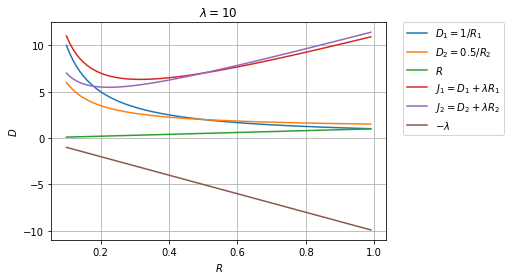

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex

# Data for plotting
R = np.arange(0.1, 1.0, 0.01)
D1 = 1/R
D2 = 0.5/R + 1
_lambda = 10
J1 = D1 + _lambda*R
J2 = D2 + _lambda*R
fig, ax = plt.subplots()
ax.plot(R, D1, label="$D_1=1/R_1$")
ax.plot(R, D2, label="$D_2=0.5/R_2$")
ax.plot(R, R, label="$R$")
ax.plot(R, J1, label="$J_1=D_1+\lambda R_1$")
ax.plot(R, J2, label="$J_2=D_2+\lambda R_2$")
ax.plot(R, -R*_lambda, label="$-\lambda$")

ax.set(xlabel='$R$', ylabel='$D$', title='$\lambda={}$'.format(_lambda))
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#fig.savefig("test.png")
plt.show()
display(Math(r'\text{Minimum of}~J_1~\text{at}~R=' + str(np.argmin(J1)*0.01 + 0.1) + r'~\text{for}~\lambda=' + str(_lambda)))
display(Math(r'\text{Minimum of}~J_2~\text{at}~R=' + str(np.argmin(J2)*0.01 + 0.1) + r'~\text{for}~\lambda=' + str(_lambda)))